### тут углы тригоном окр

C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


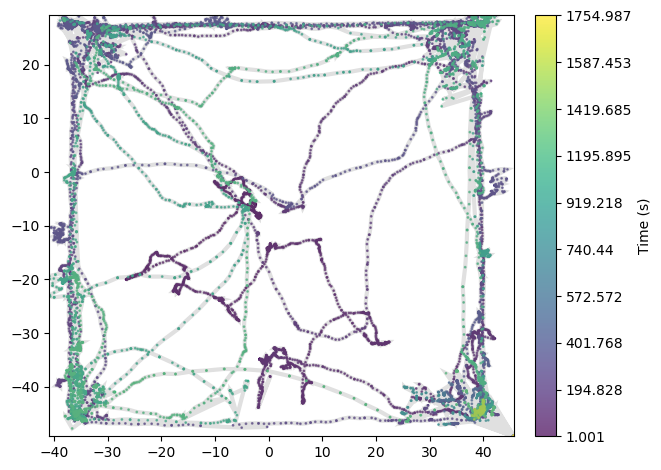

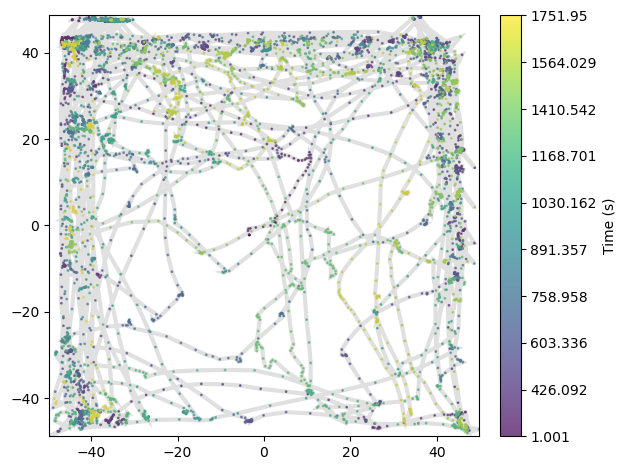

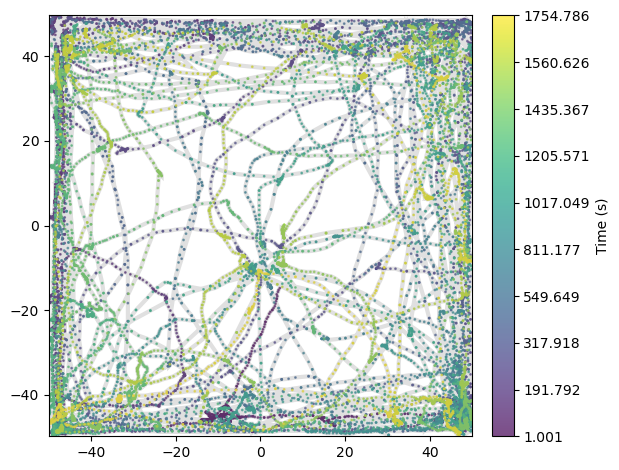

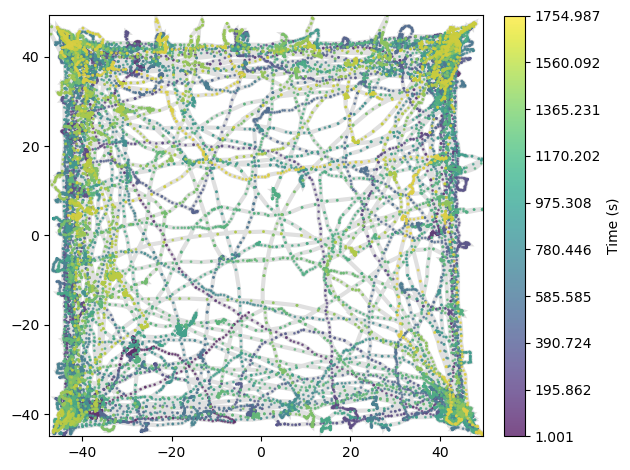

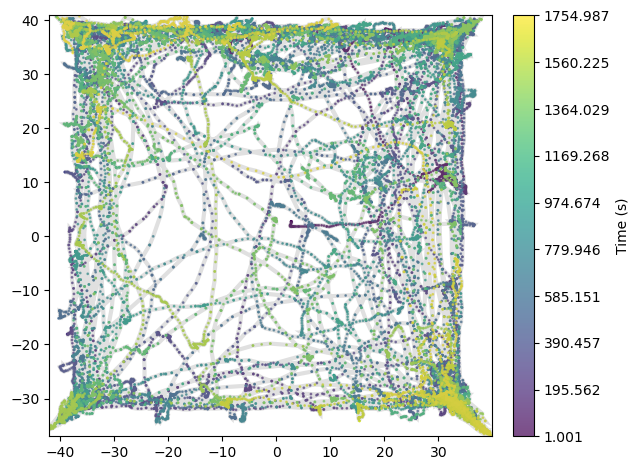

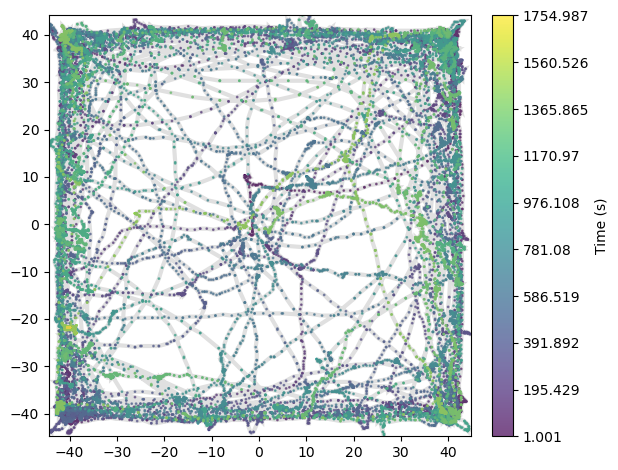

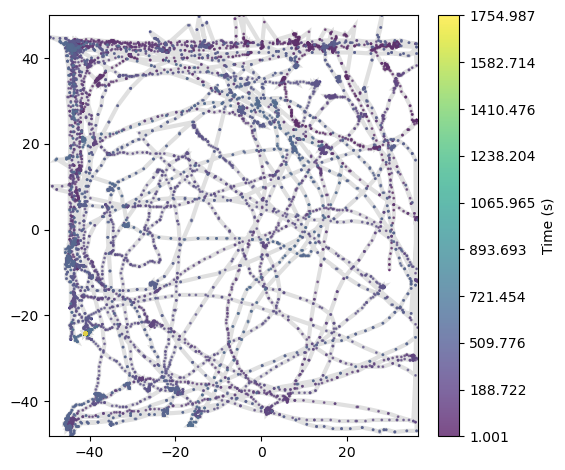

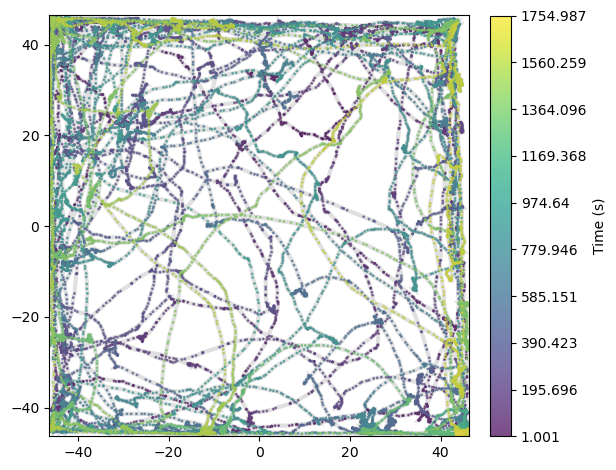

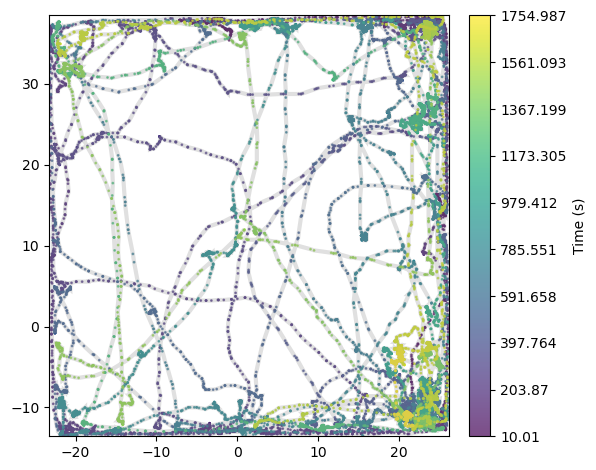

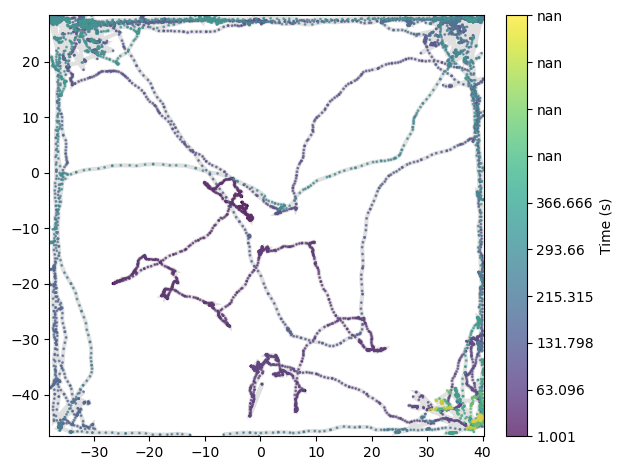

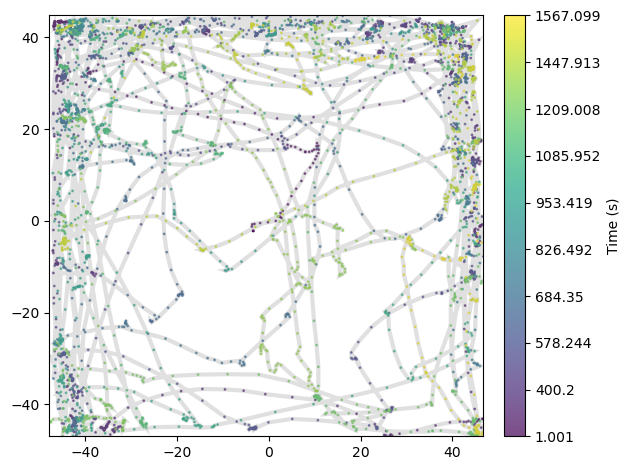

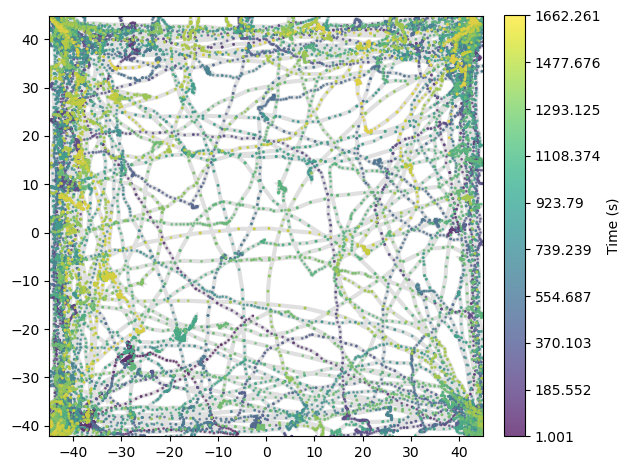

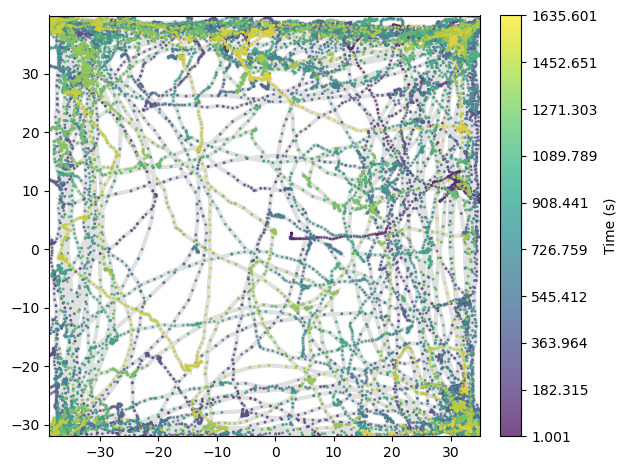

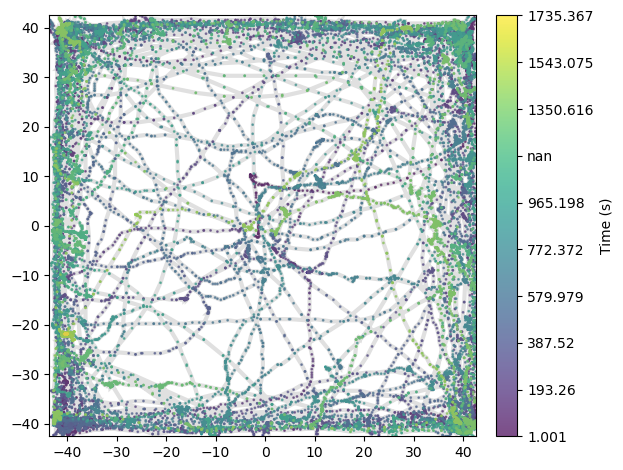

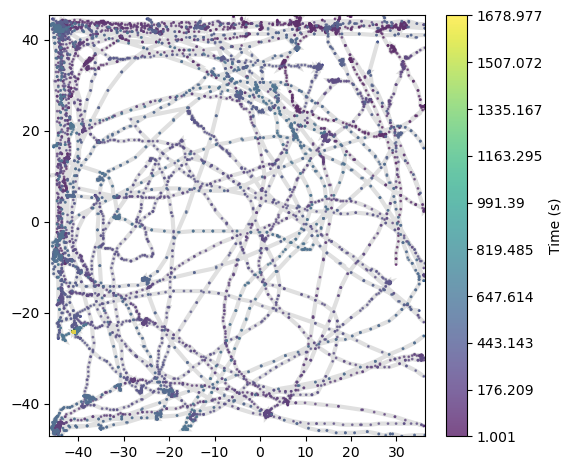

In [1]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d

import cv2

import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    df.traja.plot()
    return(df)

def cutjump(df, xmax, xmin, ymax, ymin):
    dff = df[(df['x'] < xmax) & (df['x'] > xmin) & (df['y'] < ymax) & (df['y'] > ymin)]
    ind = range(0, len(dff))
    dff = dff.reindex(ind)
    dff.traja.plot()
    return dff

#мы добавляем фильтр скорость и НЕФИЛЬТРОВАННЫЕ углы
def addFilteredV(df):
    vx = []
    vy = []
    v = []
    ang = []
    boo = True
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
            # угол
            #хз что делать с 0
            x = vvy/vvx
            if vvx >= 0:
                res = math.degrees(math.atan(x))
            else:
                res = 180 + math.degrees(math.atan(x))
            #убираем перевод в наглядную окружность. пусть остается тригонометрическая
            #if res <= 0:
                #res = -res + 90
                #вообще можно было бы записать и это как 360 - res + 90, т к лишние 360 и так вычитаются через пару строчек
            #elif res > 0:
                #res = 360 - res + 90
            if res >= 360:
                res -= 360
            ang.append(res)
            if boo:
                ang.append(res)
                boo = False
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    df.insert(6, "angles", ang)
    #df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    #df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    #df['Vy'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
tr1, tr2 = openFile('Trace_1.1.txt'), openFile('Trace_2.txt')

tr4 = cutjump(tr4, xmax=40.4, xmin=-38.1, ymax=28.3, ymin=-47.6)
tr3 = cutjump(tr3, xmax=46.8, xmin=-48, ymax=46, ymin=-47)
tr6 = cutjump(tr6, xmax=45, xmin=-45, ymax=45, ymin=-42.2)
tr7 = cutjump(tr7, xmax=35, xmin=-38.7, ymax=40, ymin=-32)
tr91 = cutjump(tr91, xmax=42.5, xmin=-43.7, ymax=42.5, ymin=-42.7)
tr92 = cutjump(tr92, xmax=36.3, xmin=-46.5, ymax=45.4, ymin=-47.3)

In [2]:
dfs = [tr1, tr2, tr3, tr4, tr5, tr6, tr7, tr91, tr92]
names = ['tr1','tr2','tr3','tr4','tr5','tr6','tr7', 'tr91','tr92']

for i in range(len(dfs)):
    print(dfs[i].isna().sum())
    dfs[i] = dfs[i].dropna()
    
for i in range(len(dfs)):
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)
    dfs[i] = addFilteredV(dfs[i])

time    0
x       0
y       0
dtype: int64
time    0
x       0
y       0
dtype: int64
time    730
x       730
y       730
dtype: int64
time    6994
x       6994
y       6994
dtype: int64
time    0
x       0
y       0
dtype: int64
time    2492
x       2492
y       2492
dtype: int64
time    2945
x       2945
y       2945
dtype: int64
time    588
x       588
y       588
dtype: int64
time    2278
x       2278
y       2278
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\

In [4]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].dropna()
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)

In [9]:
def returnStepsDFdeltaAng(df, dur):
    time_last = df['time'][0]
    ind_good = [0]
    for i in range(1, len(df)):
        if df['time'][i] - time_last >= dur:
            time_last = df['time'][i]
            ind_good.append(i)    
    df = df.iloc[ind_good]
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    #delAng = [0] * len(df) - лучше не делать так, а то мы не увидим ошибки типа нанов
    delAng = [0]
    for i in range(1,len(df)):
        d = df['angles'][i]-df['angles'][i-1]
        delAng.append(d)
    df['delta_angle'] = delAng
    return df

In [11]:
dfs_step = {}
for i in range(len(dfs)):
    print(len(dfs[i]))
    dfs_step[names[i]] = returnStepsDFdeltaAng(dfs[i], 0.5)
    print(len(dfs_step[names[i]]))

29229
3049
20317
2927
4993
1384
7198
714
17652
1823
27193
3032
27119
3005
24371
3112
25278
2779


In [15]:
bord_tr3 = {'xmi':tr3['x'].min(), 'xma': tr3['x'].max(), 'ymi':tr3['y'].min(), 'yma':tr3['y'].max()}
bord_tr4 = {'xmi':tr4['x'].min(), 'xma': tr4['x'].max(), 'ymi':tr4['y'].min(), 'yma':tr4['y'].max()}
bord_tr5 = {'xmi':tr5['x'].min(), 'xma': tr5['x'].max(), 'ymi':tr5['y'].min(), 'yma':tr5['y'].max()}
bord_tr6 = {'xmi':tr6['x'].min(), 'xma': tr6['x'].max(), 'ymi':tr6['y'].min(), 'yma':tr6['y'].max()}
bord_tr7 = {'xmi':tr7['x'].min(), 'xma': tr7['x'].max(), 'ymi':tr7['y'].min(), 'yma':tr7['y'].max()}
bord_tr91 = {'xmi':tr91['x'].min(), 'xma': tr91['x'].max(), 'ymi':tr91['y'].min(), 'yma':tr91['y'].max()}
bord_tr92 = {'xmi':tr92['x'].min(), 'xma': tr92['x'].max(), 'ymi':tr92['y'].min(), 'yma':tr92['y'].max()}
bord_tr1 = {'xmi':tr1['x'].min(), 'xma': tr1['x'].max(), 'ymi':tr1['y'].min(), 'yma':tr1['y'].max()}
bord_tr2 = {'xmi':tr2['x'].min(), 'xma': tr2['x'].max(), 'ymi':tr2['y'].min(), 'yma':tr2['y'].max()}


In [16]:
borders = {'tr1': bord_tr1, 'tr2': bord_tr2, 'tr3': bord_tr3, 'tr4': bord_tr4, 'tr5': bord_tr5, 'tr6': bord_tr6, 'tr7': bord_tr7,'tr91': bord_tr91,'tr92': bord_tr92}

In [17]:
def addNearWalls(trN, bord_trN):    
    trN['near_wall'] = 0
    ylength = bord_trN['yma'] - bord_trN['ymi'] 
    xlength = bord_trN['xma'] - bord_trN['xmi'] 
    xl = bord_trN['xmi']  + xlength * 0.1
    xr = bord_trN['xma']  - xlength * 0.1
    yd = bord_trN['ymi']  + ylength * 0.1
    yu = bord_trN['yma']  - ylength * 0.1
    
    for i in range(len(trN)):     
        if trN['x'].iloc[i] < xl:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 40
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 30
            else:
                trN['near_wall'].iloc[i] = 4
        elif trN['x'].iloc[i] > xr:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 10
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 20
            else:
                trN['near_wall'].iloc[i] = 2
        elif trN['y'].iloc[i] > yu:
            trN['near_wall'].iloc[i] = 1
        elif trN['y'].iloc[i] < yd:
            trN['near_wall'].iloc[i] = 3
    print(yd, yu)
    
    return trN

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\

-37.053399999999996 37.1834


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\

-8.364999999999998 33.235


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 4
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 40
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\

-37.7954 35.617399999999996


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 3
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 20
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\

-39.9005 20.7195


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 3
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 20
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 30
C:\Users

-39.8268 39.678799999999995


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 3
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 30
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 4
C:\Users\

-33.4707 36.219699999999996


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\

-24.753 32.775


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 20
C:\Users

-33.9952 33.9952


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8804\1388506519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\

-37.9063 36.1313


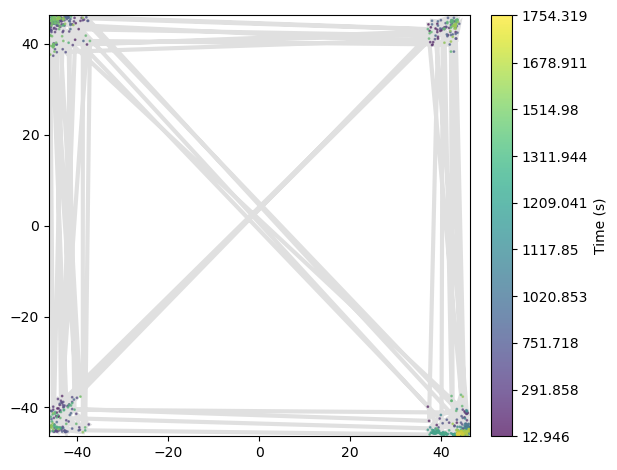

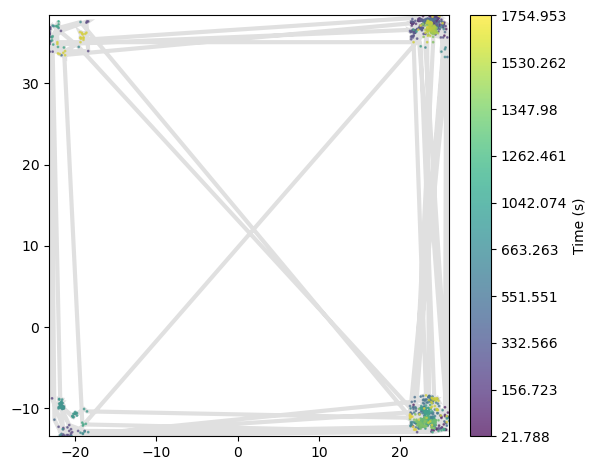

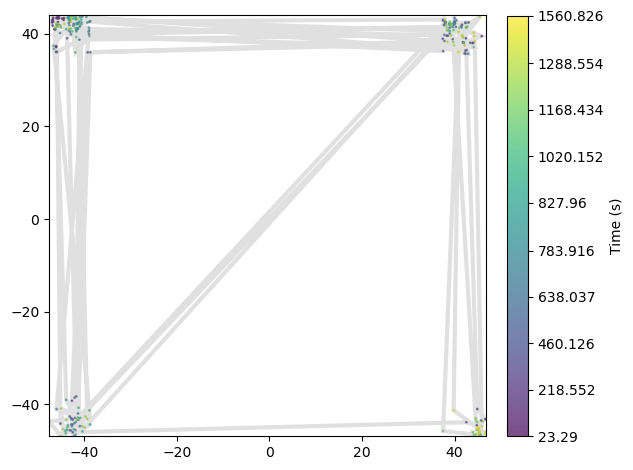

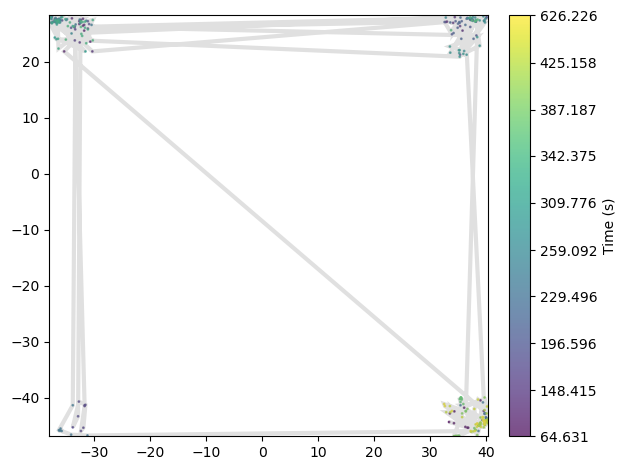

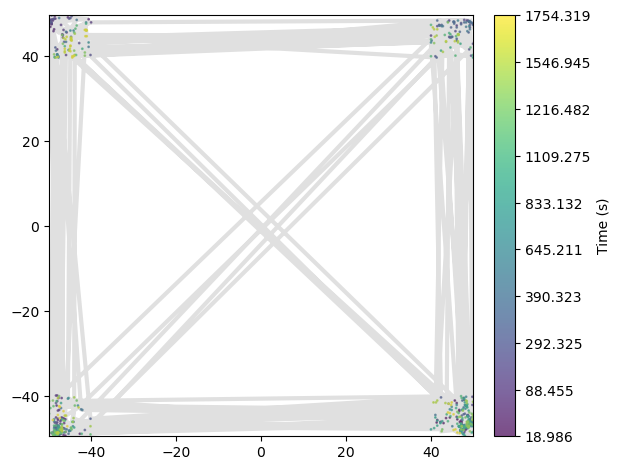

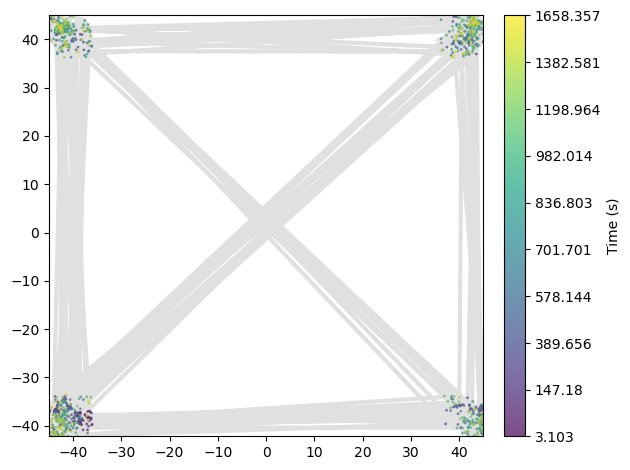

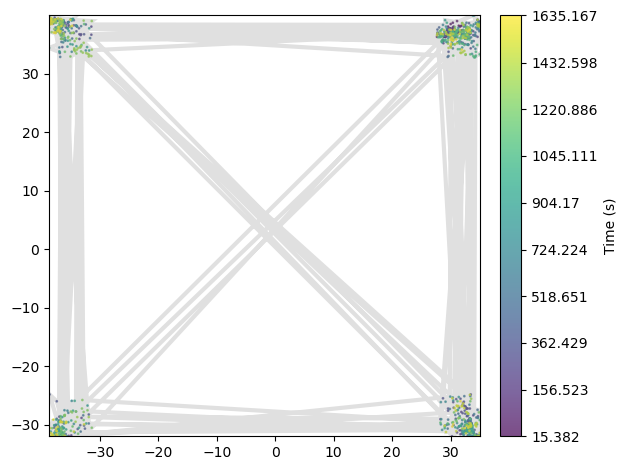

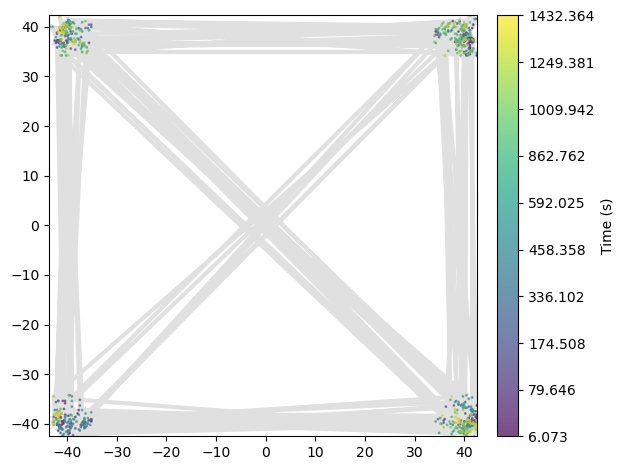

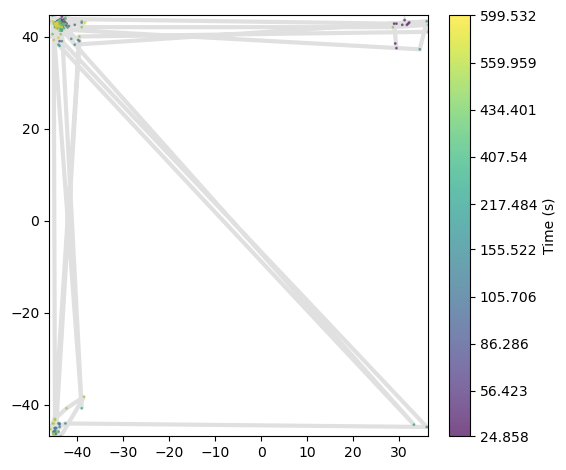

In [18]:
for i in dfs_step:
    dfs_step[i] = addNearWalls(dfs_step[i],borders[i])
    traja.plot(dfs_step[i].loc[dfs_step[i]['near_wall'] >= 10])

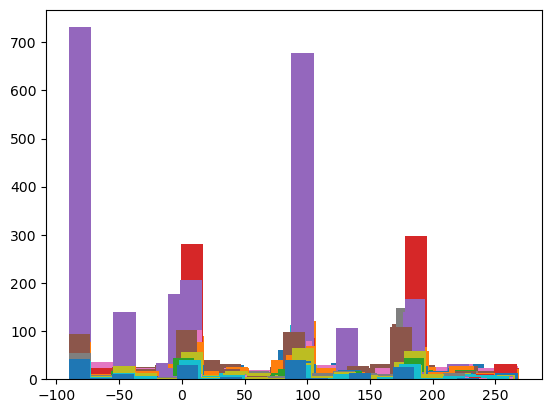

In [19]:
all_hist = {}
for numb in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
    all_hist[str(numb)] = {}
    for na in names:
        dffor1line = dfs_step[na].loc[dfs_step[na]['near_wall'] == numb]
        y, binEdges, _ = plt.hist(dffor1line['angles'], 20)
        x = 0.5 * (binEdges[1:] + binEdges[:-1])
        all_hist[str(numb)][na] = [x, y]

In [20]:
all_hist

{'0': {'tr1': [array([-81.28274831, -63.84824494, -46.41374156, -28.97923818,
          -11.54473481,   5.88976857,  23.32427195,  40.75877532,
           58.1932787 ,  75.62778207,  93.06228545, 110.49678883,
          127.9312922 , 145.36579558, 162.80029896, 180.23480233,
          197.66930571, 215.10380909, 232.53831246, 249.97281584]),
   array([54., 13., 25.,  7.,  7., 55.,  7., 30., 18., 13., 60., 13., 33.,
          17., 14., 62., 16., 19., 32., 21.])],
  'tr2': [array([-81.281741  , -63.84522301, -46.40870501, -28.97218702,
          -11.53566902,   5.90084898,  23.33736697,  40.77388497,
           58.21040296,  75.64692096,  93.08343895, 110.51995695,
          127.95647494, 145.39299294, 162.82951093, 180.26602893,
          197.70254693, 215.13906492, 232.57558292, 250.01210091]),
   array([57., 11., 17.,  1.,  3., 44.,  0., 21.,  6.,  5., 65.,  6., 22.,
           7.,  8., 44.,  6., 10., 10., 15.])],
  'tr3': [array([-81.04843733, -63.14531199, -45.24218665, -27.33906131

In [22]:
pwd
C:\\Users\\Lenovo\\1navigation\\angles_hist\\all_angles\\

'C:\\Users\\Lenovo\\1navigation'

### блин мы снова построили гистограммы для углов а не для изменения углов

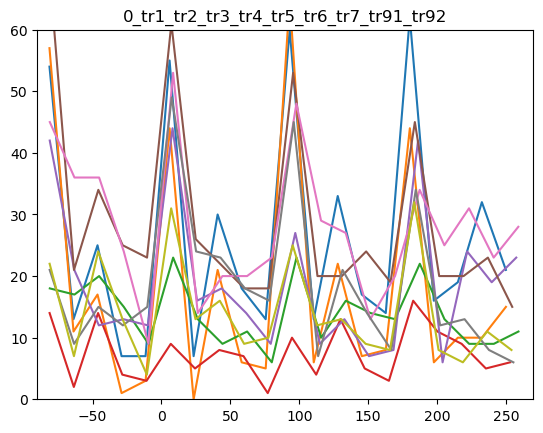

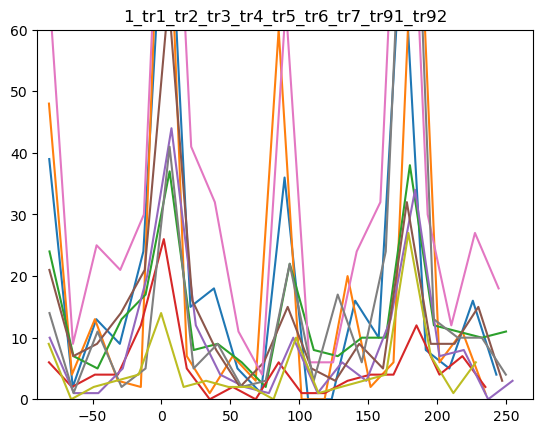

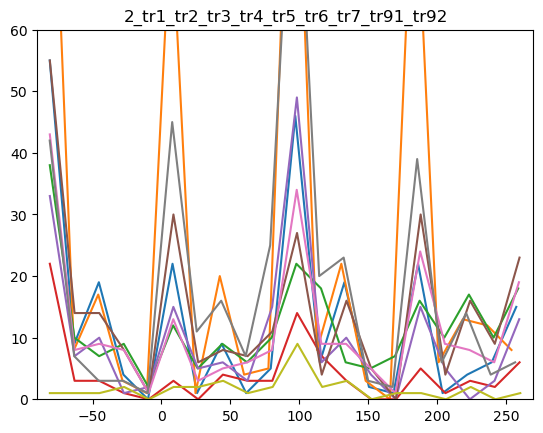

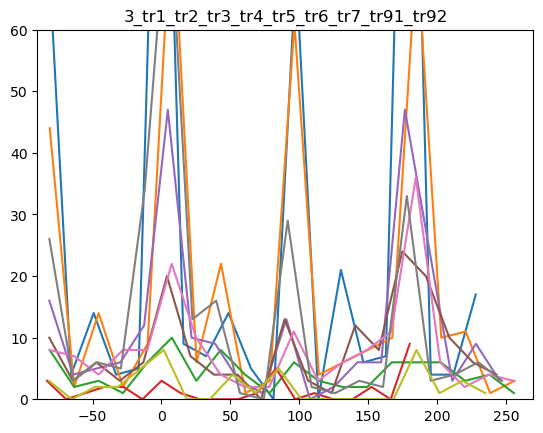

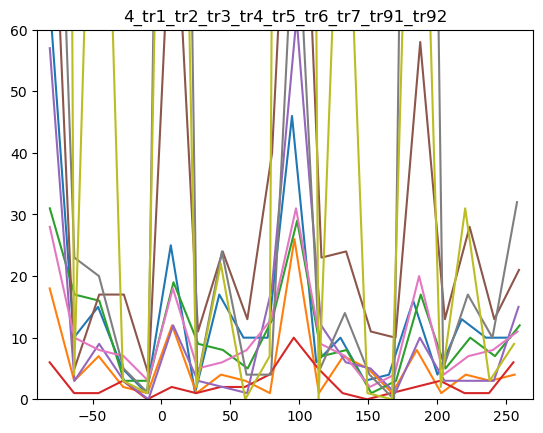

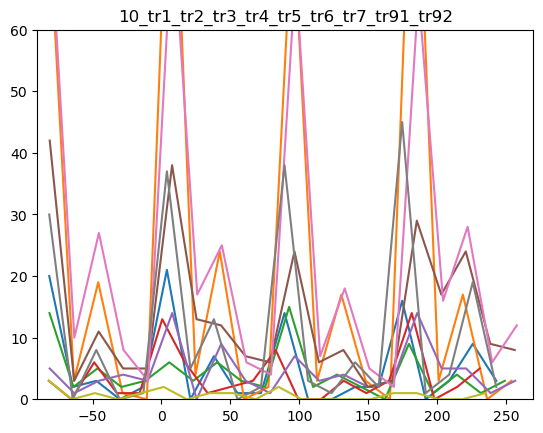

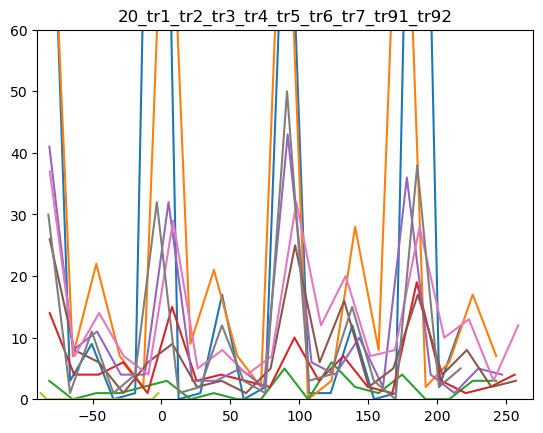

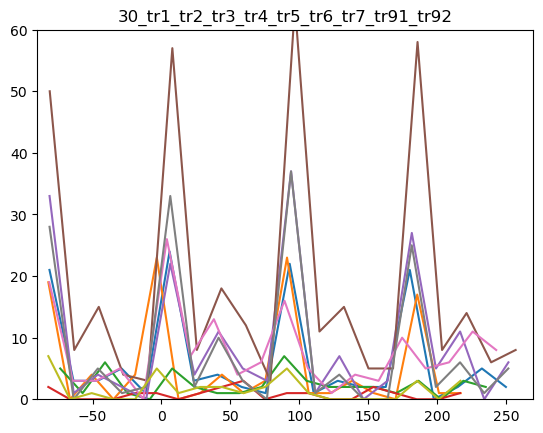

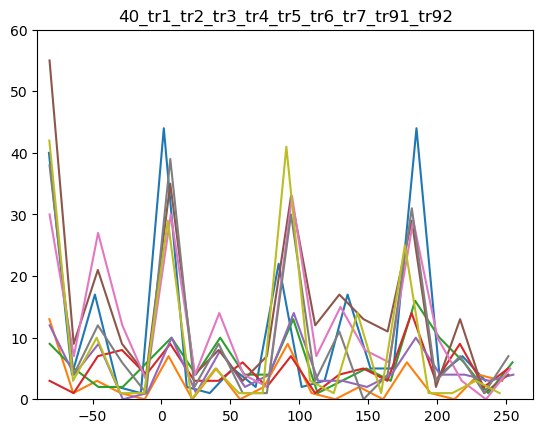

In [24]:
for i in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
    plt.figure()
    ax = plt.gca()
    ax.set_xlim([-90, 270])
    ax.set_ylim([0, 60])
    tit = str(i)
    for na in names:
        plt.plot(all_hist[str(i)][na][0], all_hist[str(i)][na][1])
        tit = tit + '_' + na
    plt.title(tit)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\angles_hist\\all_angles\\'+tit)
    plt.show()

#нарисуем то же распледеление но пусть по y будет корень из прошлого y
for i in [10, 20, 30, 40]:
    plt.figure()
    tit = str(i) + '_sqrt'
    for na in names:
        all_hist[str(i)][na][1] = np.sqrt(all_hist[str(i)][na][1])
        plt.plot(all_hist[str(i)][na][0], all_hist[str(i)][na][1])
        tit = tit + '_' + na
    plt.title(tit)
    plt.show()

In [25]:
dfs_step

{'tr1':           time       x       y         Vx         Vy          V      angles  \
 0        1.068  -2.603  33.969   3.823529  -7.647059   8.549672  -63.434949   
 1        1.602   0.911  33.188  22.970588  -3.823529  23.286634   -9.450425   
 2        2.202   3.904  32.928   3.939394   0.000000   3.939394    0.000000   
 3        2.703   2.213  33.448  -3.823529   3.823529   5.407287  135.000000   
 4        3.203   1.171  32.668   7.878788 -19.696970  21.214286  -68.198591   
 ...        ...     ...     ...        ...        ...        ...         ...   
 3044  1751.817  43.860 -45.943   0.000000  -3.823529   3.823529  -90.000000   
 3045  1752.317  43.730 -45.943  -3.939394   0.000000   3.939394  180.000000   
 3046  1753.285  43.730 -45.943  -3.939394   0.000000   3.939394  180.000000   
 3047  1753.819  43.991 -45.943   3.852941   0.000000   3.852941    0.000000   
 3048  1754.319  43.860 -45.943  -3.969697   0.000000   3.969697  180.000000   
 
       delta_angle  near_wall  

for i in [10, 20, 30, 40]:
    print(i)
    tit = str(i) + '_sqrt'
    for na in names:
        print(all_hist[str(i)][na][0])
        

### возьмем от каждой мыши одинаковое количество точек. но от некотррых мышей выйдет чуть меньше точек, чем от большинства

In [26]:
for i in dfs_step:
    for n in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
        print(i + ' ' + str(n))
        print(len(dfs_step[i].loc[dfs_step[i]['near_wall'] == n]))

tr1 0
516
tr1 1
389
tr1 2
247
tr1 3
543
tr1 4
281
tr1 10
106
tr1 20
610
tr1 30
127
tr1 40
230
tr2 0
358
tr2 1
391
tr2 2
519
tr2 3
371
tr2 4
112
tr2 10
459
tr2 20
552
tr2 30
107
tr2 40
58
tr3 0
281
tr3 1
267
tr3 2
237
tr3 3
85
tr3 4
223
tr3 10
87
tr3 20
35
tr3 30
49
tr3 40
120
tr4 0
149
tr4 1
105
tr4 2
83
tr4 3
30
tr4 4
52
tr4 10
72
tr4 20
108
tr4 30
16
tr4 40
99
tr5 0
379
tr5 1
185
tr5 2
202
tr5 3
227
tr5 4
228
tr5 10
90
tr5 20
228
tr5 30
182
tr5 40
102
tr6 0
576
tr6 1
274
tr6 2
288
tr6 3
164
tr6 4
641
tr6 10
272
tr6 20
155
tr6 30
372
tr6 40
290
tr7 0
558
tr7 1
690
tr7 2
228
tr7 3
165
tr7 4
209
tr7 10
484
tr7 20
267
tr7 30
155
tr7 40
249
tr91 0
370
tr91 1
316
tr91 2
375
tr91 3
273
tr91 4
968
tr91 10
217
tr91 20
218
tr91 30
165
tr91 40
210
tr92 0
281
tr92 1
102
tr92 2
34
tr92 3
43
tr92 4
2086
tr92 10
14
tr92 20
2
tr92 30
33
tr92 40
184


In [40]:
def makeDictCutDfsSteps(dictN, n1, l):
    for i in dfs_step:
        print(i + ' ' + str(n1))
        k = dfs_step[i].loc[dfs_step[i]['near_wall'] == n1]
        print(len(k))
        if len(k > l):
            k = k.iloc[0:l]
        print(len(k))
        dictN[i] = k

In [44]:
dict10 = {}
makeDictCutDfsSteps(dict10, 10, 90)
dict20 = {}
makeDictCutDfsSteps(dict20, 20, 108)
dict30 = {}
makeDictCutDfsSteps(dict30, 30, 107)
dict40 = {}
makeDictCutDfsSteps(dict40, 40, 102)

tr1 10
106
90
tr2 10
459
90
tr3 10
87
87
tr4 10
72
72
tr5 10
90
90
tr6 10
272
90
tr7 10
484
90
tr91 10
217
90
tr92 10
14
14
tr1 20
610
108
tr2 20
552
108
tr3 20
35
35
tr4 20
108
108
tr5 20
228
108
tr6 20
155
108
tr7 20
267
108
tr91 20
218
108
tr92 20
2
2
tr1 30
127
107
tr2 30
107
107
tr3 30
49
49
tr4 30
16
16
tr5 30
182
107
tr6 30
372
107
tr7 30
155
107
tr91 30
165
107
tr92 30
33
33
tr1 40
230
102
tr2 40
58
58
tr3 40
120
102
tr4 40
99
99
tr5 40
102
102
tr6 40
290
102
tr7 40
249
102
tr91 40
210
102
tr92 40
184
102


In [45]:
dict0 = {}
makeDictCutDfsSteps(dict0, 0, 281)
dict1 = {}
makeDictCutDfsSteps(dict1, 1, 200)
dict2 = {}
makeDictCutDfsSteps(dict2, 2, 202)
dict3 = {}
makeDictCutDfsSteps(dict3, 3, 164)
dict4 = {}
makeDictCutDfsSteps(dict4, 4, 209)

tr1 0
516
281
tr2 0
358
281
tr3 0
281
281
tr4 0
149
149
tr5 0
379
281
tr6 0
576
281
tr7 0
558
281
tr91 0
370
281
tr92 0
281
281
tr1 1
389
200
tr2 1
391
200
tr3 1
267
200
tr4 1
105
105
tr5 1
185
185
tr6 1
274
200
tr7 1
690
200
tr91 1
316
200
tr92 1
102
102
tr1 2
247
202
tr2 2
519
202
tr3 2
237
202
tr4 2
83
83
tr5 2
202
202
tr6 2
288
202
tr7 2
228
202
tr91 2
375
202
tr92 2
34
34
tr1 3
543
164
tr2 3
371
164
tr3 3
85
85
tr4 3
30
30
tr5 3
227
164
tr6 3
164
164
tr7 3
165
164
tr91 3
273
164
tr92 3
43
43
tr1 4
281
209
tr2 4
112
112
tr3 4
223
209
tr4 4
52
52
tr5 4
228
209
tr6 4
641
209
tr7 4
209
209
tr91 4
968
209
tr92 4
2086
209


In [49]:
dict20

{'tr1':           time       x       y         Vx         Vy          V     angles  \
 40      21.688  37.353 -42.949  11.848485 -27.606061  30.041324 -66.771054   
 99      52.286  37.093 -39.826   0.000000  -3.823529   3.823529 -90.000000   
 100     52.786  39.045 -43.860  11.848485 -19.696970  22.986022 -58.971473   
 101     53.287  42.949 -43.991  30.617647   0.000000  30.617647   0.000000   
 102     53.787  43.470 -43.340   3.939394  11.818182  12.457457  71.565051   
 ...        ...     ...     ...        ...        ...        ...        ...   
 1844  1022.188  45.943 -44.771   0.000000  -3.823529   3.823529 -90.000000   
 1845  1026.025  45.943 -44.641   0.000000   3.939394   3.939394  90.000000   
 1846  1028.027  45.943 -44.641   0.000000   3.939394   3.939394  90.000000   
 1847  1028.561  45.943 -44.902   0.000000  -3.969697   3.969697 -90.000000   
 1848  1031.697  45.943 -44.641   0.000000   3.939394   3.939394  90.000000   
 
       delta_angle  near_wall  
 40    -111

In [65]:
def makeMergDf(dict):
    

['tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92']

In [66]:
ser_try = pd.concat([dict40['tr1']['angles'], dict40['tr2']['angles'], dict40['tr3']['angles'],dict40['tr4']['angles'],dict40['tr5']['angles'],dict40['tr6']['angles'],dict40['tr7']['angles'],dict40['tr91']['angles'],dict40['tr92']['angles']])
ser_try = ser_try.reset_index()
ser_try = ser_try.drop(['index'], axis=1)
ser_try


angles
0     63.258925
1    224.780477
2    146.309932
3     90.000000
4    135.000000
..          ...
890  -63.389763
891   90.000000
892   75.950475
893   90.000000
894   90.000000

[895 rows x 1 columns]

In [68]:
list10 = []
for i in dict10:
    list10.append(dict10[i]['angles'])
df10 = pd.concat(list10)
df10 = df10.reset_index()
df10 = df10.drop(['index'], axis=1)
df10

angles
0      0.000000
1    -90.000000
2    180.000000
3    180.000000
4    -45.000000
..          ...
788   30.957106
789   92.856206
790  -11.305588
791   48.806075
792  -90.000000

[793 rows x 1 columns]

In [69]:
list40 = []
for i in dict40:
    list40.append(dict40[i]['angles'])
df40 = pd.concat(list40)
df40 = df40.reset_index()
df40 = df40.drop(['index'], axis=1)
df40


angles
0     63.258925
1    224.780477
2    146.309932
3     90.000000
4    135.000000
..          ...
890  -63.389763
891   90.000000
892   75.950475
893   90.000000
894   90.000000

[895 rows x 1 columns]

In [70]:
list20 = []
for i in dict20:
    list20.append(dict20[i]['angles'])
df20 = pd.concat(list20)
df20 = df20.reset_index()
df20 = df20.drop(['index'], axis=1)
df20

angles
0    -66.771054
1    -90.000000
2    -58.971473
3      0.000000
4     71.565051
..          ...
774  -90.000000
775  135.000000
776   90.000000
777  -90.000000
778    0.000000

[779 rows x 1 columns]

In [71]:
list30 = []
for i in dict30:
    list30.append(dict30[i]['angles'])
df30 = pd.concat(list30)
df30 = df30.reset_index()
df30 = df30.drop(['index'], axis=1)
df30

angles
0      0.000000
1    -90.000000
2     90.000000
3    180.000000
4     90.000000
..          ...
729   75.950475
730   90.000000
731  180.000000
732   90.000000
733   63.389763

[734 rows x 1 columns]

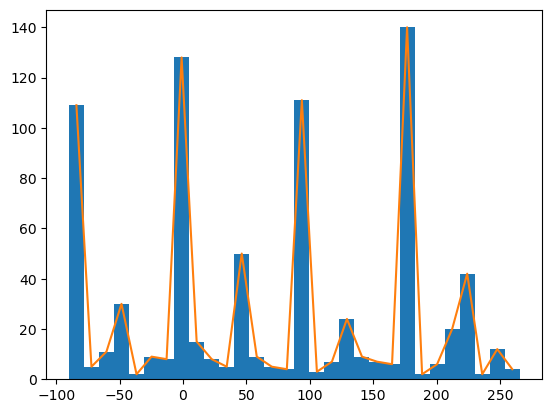

In [74]:
y10, binEdges, _ = plt.hist(df10, 30)
x10 = 0.5 * (binEdges[1:] + binEdges[:-1])
plot10 = [x10, y10]
plt.plot(x10, y10)

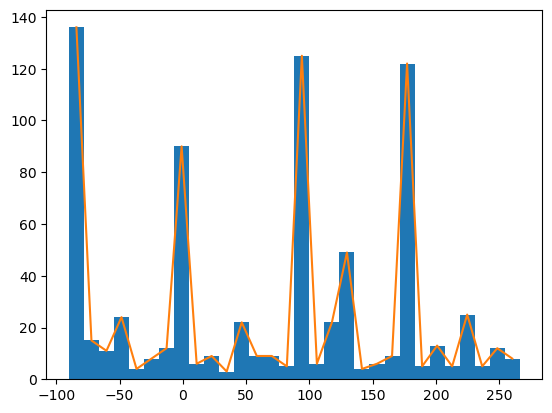

In [75]:
y20, binEdges, _ = plt.hist(df20, 30)
x20 = 0.5 * (binEdges[1:] + binEdges[:-1])
plot20 = [x20, y20]
plt.plot(x20, y20)

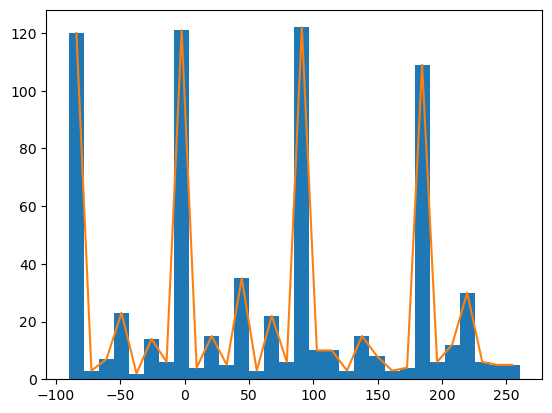

In [76]:
y30, binEdges, _ = plt.hist(df30, 30)
x30 = 0.5 * (binEdges[1:] + binEdges[:-1])
plot30 = [x30, y30]
plt.plot(x30, y30)

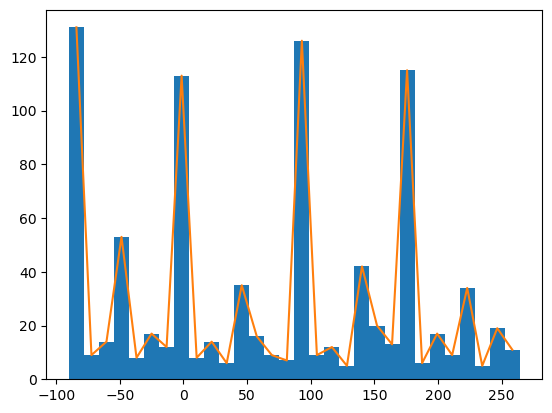

In [77]:
y40, binEdges, _ = plt.hist(df40, 30)
x40 = 0.5 * (binEdges[1:] + binEdges[:-1])
plot40 = [x40, y40]
plt.plot(x40, y40)

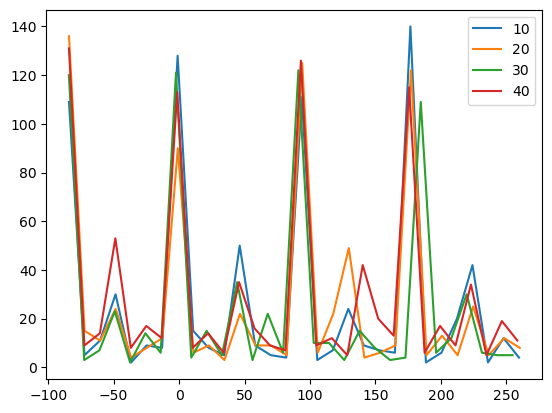

In [80]:
plt.plot(x10, y10, label='10')
plt.plot(x20, y20, label='20')
plt.plot(x30, y30, label='30')
plt.plot(x40, y40, label='40')

plt.legend()
plt.show()


In [ ]:
averHists = {}
for na in names:
    dffor1line = dfs_step[na].loc[dfs_step[na]['near_wall'] == numb]
    y, binEdges, _ = plt.hist(dffor1line['angles'], 20)
    x = 0.5 * (binEdges[1:] + binEdges[:-1])
    all_hist[str(numb)][na] = [x, y]